In [1]:
from sympy import symbols, solve, solveset, S, simplify, expand, nsolve, evalf
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [2]:
file = open('histogram_complexes_time.dat', 'r')


real_iterations = 50000 + 1
time = np.zeros(real_iterations)
A = np.zeros(real_iterations)
P = np.zeros(real_iterations)
T = np.zeros(real_iterations)
AP = np.zeros(real_iterations)
APT = np.zeros(real_iterations)

count = -1
for line in file:
    linesplit = line.split()

    if linesplit[0] == 'Time':
        count += 1
        time[count] = float(linesplit[2])

    if linesplit[1] == 'ap2:' and len(linesplit) == 3:
        A[count]= (int(linesplit[0]))

    if linesplit[1] == 'pip2:' and len(linesplit) == 3:
        P[count] = (int(linesplit[0]))

    if linesplit[1] == 'trans:' and len(linesplit) == 3:
        T[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 5:
        AP[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 7:
        APT[count] = (int(linesplit[0]))

In [110]:
APT.size

50001

In [ ]:
file = open('copy_numbers_time.dat', 'r')

time = []
A = []
P = []
T = []
AP = []
APT = []

for line in file:
    linesplit = line.split
    time.append(linesplit[0])
    A.append(linesplit)

In [3]:
def solver(Na,Nb,Nc,L,ka1,kb1,ka2,kb2):   
    
    Kd1 = (kb1*(10**-6))/ka1
    Kd2 = (kb2*(10**-6))/(ka2/2)
    
    na_imp = symbols('na_imp', real = True, positive = True)

    nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

    x = solveset(eq1, na_imp, domain = S.Reals)
    #na = nsolve(eq1, na_imp, -10, dict = True)
    
    
    na = 0 
    for i in list(x):
        if i > 0:
            na = i
    
    nab = (((Nb*na)-(Na*na)+(na**2))/((L**3)*Kd1))
    
    nc = na + nab + Nc - Na
    
    nb = Nb - Na + na
    
    nabc = Nc - nc
    
    na_array = na * np.ones(50001)
    nb_array = nb * np.ones(50001)
    nc_array = nc * np.ones(50001)
    nab_array = nab * np.ones(50001)
    nabc_array = nabc * np.ones(50001)


    print('Free AP2: ' + str(na))
    print('Free PIP2: ' + str(nb))
    print('Free Transferrin: ' + str(nc))
    print('AP2-PIP2: ' + str(nab))
    print('AP2-PIP2-Transferrin: ' + str(nabc))

    return na_array, nb_array, nc_array, nab_array, nabc_array
    

In [ ]:
nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

In [119]:
t = np.full((1, 100), 5)
t.size

100

In [153]:
Na = 500
Nb = 1000
Nc = 100
L = 100
ka1 = 0.1
kb1 = 33
ka2 = 0.1362
kb2 = 48.17
Kd1 = (kb1*10**-6)/ka1
Kd2 = (kb2*10**-6)/(ka2/2)

print(Kd1)
print(Kd2)

0.00032999999999999994
0.0007073421439060207


In [156]:
na_imp, Na, Nb, Nc, L, Kd1, Kd2 = symbols('na_imp, Na, Nb, Nc, L, Kd1, Kd2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)


x = eq1.evalf(subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})


#x = simplify(eq1)
simplify(x)
#expand(x)

(-9.18273645546373e-10*na_imp**4 - 1.22130394857668e-6*na_imp**3 - 0.000262013865932048*na_imp**2 + 0.0588278484848485*na_imp + 0.3535)/(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 500.0)

In [151]:
x, y = symbols('x, y')

y = 7
eq = x**2 + y 

eq.evalf(subs={y:5})

x**2 + 5.0

In [171]:
def g(x):
    
    return (x**2 + x)

brentq(g, 0.5, -0.5)

3.7977606756414105e-23

In [176]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()

In [177]:
nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)

eq1

-Kd2 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + Nb*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + 4.99849e-7*(0.000428614290000429*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 1)**2)*(-Na + Nc + 3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 

In [175]:
def f(x):
    Na = 500
    Nb = 1000
    Nc = 100
    L = 100
    ka1 = 0.1
    kb1 = 33
    ka2 = 0.1362
    kb2 = 48.17

    Kd1 = (kb1*10**-6)/ka1
    Kd2 = (kb2*10**-6)/(ka2/2)
    
    nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)
    return (eq1)

brentq(f, -1, 100)

ValueError: f(a) and f(b) must have different signs

In [65]:
#with realistic Kds
x = solver(50,500,50,50,0.0000033,0.0000000707)
x

TypeError: solver() missing 2 required positional arguments: 'ka2' and 'kb2'

In [ ]:
#Kd increased by several orders of magnitute make for more interesting results 
x = solver(50,500,50,50,0.0033,0.000707)
x

Free AP2: 5.41924493180763
Free PIP2: 455.419244931808
Free Transferrin: 11.4023441680364
AP2-PIP2: 5.98309923622874
AP2-PIP2-Transferrin: 38.5976558319636


In [4]:
A_calc, P_calc, T_calc, AP_calc, APT_calc = solver(500,1000,100,100, 0.1, 33, .1362, 48.17)


Free AP2: 137.342409734781
Free PIP2: 637.342409734781
Free Transferrin: 2.59738664128759
AP2-PIP2: 265.254976906506
AP2-PIP2-Transferrin: 97.4026133587124


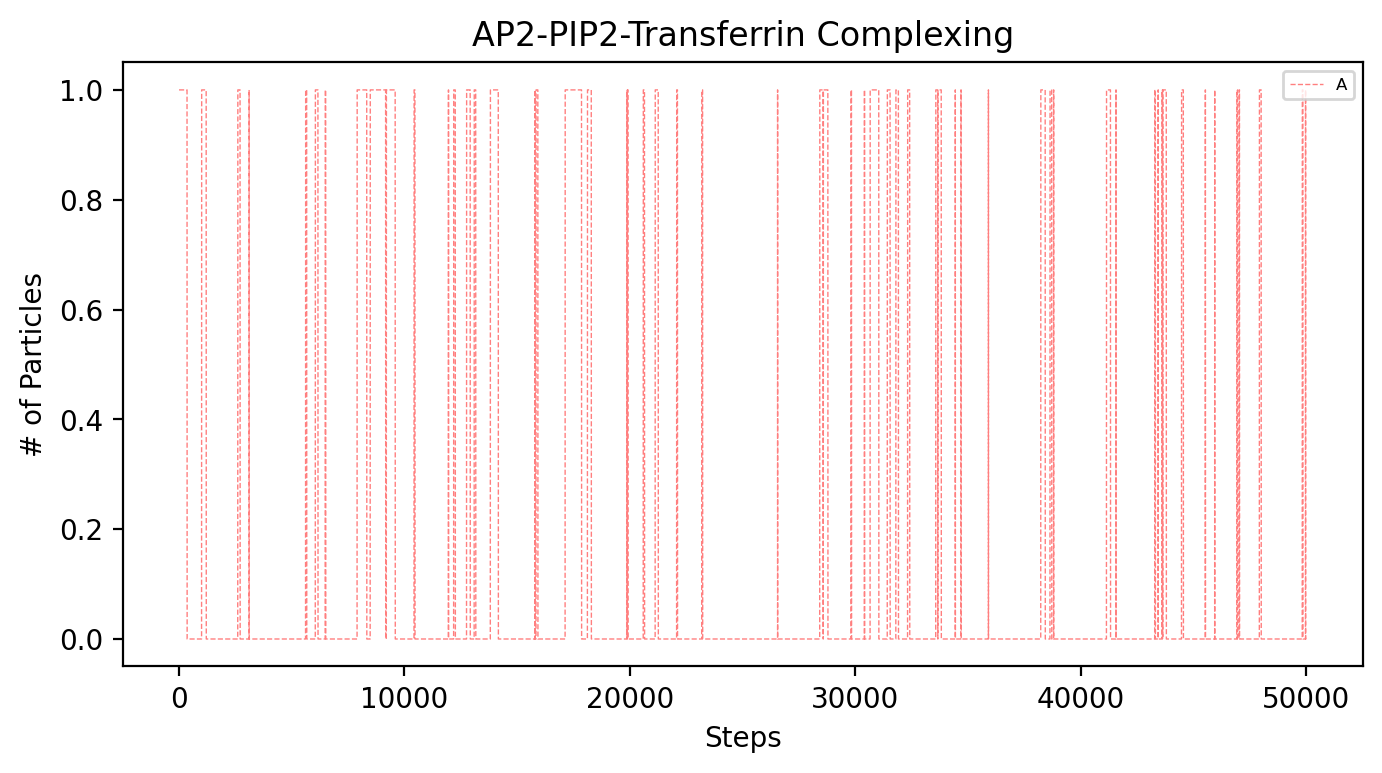

In [6]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
#ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(A,c='red',alpha=0.5,lw=0.5,ls='--', label = 'A');
#ax.plot(AP,c='cyan',alpha=0.5,lw=0.5,ls='--', label = 'AP');
#ax.plot(P,c='blue',alpha=0.5,lw=0.5,ls='--', label = 'P');
#ax.plot(APT,c='magenta',alpha=0.5,lw=0.5,ls='--', label = 'APT');
#ax.plot(T,c='green',alpha=0.5,lw=0.5,ls='--', label = 'T');
#ax.plot(A_calc,c='red',alpha=0.5,lw=0.5,ls='--');
#ax.plot(P_calc,c='blue',alpha=0.5,lw=0.5,ls='--');
#ax.plot(T_calc,c='green',alpha=0.5,lw=0.5,ls='--');
#ax.plot(AP_calc,c='cyan',alpha=0.5,lw=0.5,ls='--');
#ax.plot(APT_calc,c='magenta',alpha=0.5,lw=0.5,ls='--');

plt.title('AP2-PIP2-Transferrin Complexing')
plt.xlabel('Steps')
plt.ylabel('# of Particles')
#plt.tight_layout(pad=0)
plt.legend(loc = 'upper right', prop={'size': 6})
plt.savefig('./P_excess_copynumbers.png',dpi=250);